<a href="https://colab.research.google.com/github/csarux/MLTests/blob/main/KerasTest1EBT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inversión del modelo sensitométrico mediante Deep Learning

Importación de librerias

In [1]:
# Import pandas 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
import numpy as np

In [15]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler
# Estratificación de los datos para la regresión
from sklearn.model_selection import StratifiedKFold

In [5]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

Instalar módulo para dar formato científico a los gráficos

In [6]:
pip install SciencePlots

  Created wheel for SciencePlots: filename=SciencePlots-1.0.6-cp36-none-any.whl size=4140 sha256=ad018eda816b5f52c5b529229302f14c4bf5bbea382377d85ad56a3a353b3098
  Stored in directory: /root/.cache/pip/wheels/66/f8/97/c4d1f89a613feb90268bf62b192c3038e87e453d6d36b7726c
Successfully built SciencePlots


Configurar el estilo de los gráficos

In [7]:
# Para el light theme
# plt.style.use(['/root/.config/matplotlib/stylelib/science.mplstyle', '/root/.config/matplotlib/stylelib/notebook.mplstyle'])

# Para el lado oscuro
plt.style.use(['/root/.config/matplotlib/stylelib/science.mplstyle', '/root/.config/matplotlib/stylelib/notebook.mplstyle', '/root/.config/matplotlib/stylelib/high-vis.mplstyle', 'dark_background'])
mpl.rcParams['axes.facecolor']='333333'
mpl.rcParams['figure.facecolor']='222222'

## Acondicionamiento de los datos

Definir las funciones del modelo sensitométrico para los tres canales de color

In [8]:
# Fase roja
def d2prf(D):
  return 0.5*(0.601*(1-np.exp(-0.2*D-0.022*D**2)) + 0.159 * (1-np.exp(-0.092*D)))
# Fase verde
def d2pgf(D):
  return 0.5*(0.367*(1-np.exp(-0.2*D-0.004*D**2)) + 0.467 * (1-np.exp(-0.092*D)))
# Fase azul
def d2pbf(D):
  return 0.5*(0.109*(1-np.exp(-0.2*D-0.002*D**2)) + 0.418 * (1-np.exp(-0.092*D)))

In [9]:
Da = np.arange(0.3, 5., 0.001)

In [10]:
da = np.array([[d2prf(D), d2pgf(D), d2pbf(D)] for D in Da])

In [11]:
DSa = 10.**-da

In [12]:
def DSf(D):
  dv = np.array([d2prf(D), d2pgf(D), d2pbf(D)])
  return 10.**-dv

Escalar los datos

In [13]:
# Scale the data with `StandardScaler`

# Define the scaler 
scaler = StandardScaler().fit(DSa)

# Scale the train set
DSa = scaler.transform(DSa)

Separar entrenamiento y evaluación

In [20]:
# Split the data up in train and test sets
DS_train, DS_test, D_train, D_test = train_test_split(DSa, Da, test_size=0.25, random_state=42)

## Modelo

Definir el modelo

In [21]:
model = Sequential()
model.add(Dense(16, input_dim=3, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse', 'mae'])

Entrenar el modelo

In [36]:
model.fit(DS_train, D_train, epochs=1000, verbose=1)

In [37]:
D_pred = model.predict(DS_test)

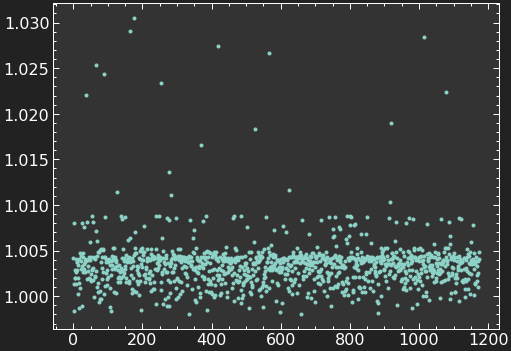

In [38]:
plt.plot(D_pred[...,0]/D_test, '.')
plt.show()

In [31]:
D_pred[..., 0]

array([4.5952425, 2.7328606, 0.6844379, ..., 4.4342046, 1.199502 ,
       3.0553546], dtype=float32)